<a href="https://colab.research.google.com/github/SebC750/Sebastian_Chalarca_Computer_Vision_Assignments/blob/main/Problem_set_06_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of Dr. Christoforos Christoforou's course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Problem Set 06 - Segmentation
**Professor:** Dr. Christoforos Christoforou

For this problem set you will need the following libraries, which are pre-installed with the colab environment:

* [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
* [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
* [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
* [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
* [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.
* [Sklearn](https://scikit-learn.org/stable/) is a machine learning library.

You can load them using the following import statement:

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy import ndimage as nd
from skimage.filters import roberts, sobel, scharr, prewitt



## Image Sources
For this problem set you are asked to load and pre-process images. You can choose to use your own images, or download images from the following sources:

**Image source examples**

- [Place Kitten API](https://placekitten.com/) - use the base Place Kitten URL followed by a width and height separated by backslashes ''/''. For example, use the URL `https://placekitten.com/500/300` to fetch a cat image with a width of 500px and height of 300px.

- [Lorem Picsum Photos API ](https://picsum.photos/images) - generates random images from the web.

- [NC State University Libraries Special Collections](https://d.lib.ncsu.edu/collections/catalog) - browse the site to find an image thumbnail. Right-click on the thumbnail and select "Copy Image Address". The address will look like this: `https://iiif.lib.ncsu.edu/iiif/0051230/square/300,/0/default.jpg`. Replace the word "square" with the word "full" and replace "300" with "800" to access the full image at a width of 800px.

- [Google Image search](https://www.google.com/imghp?hl=en) - search for an image. Left-click one of the returned images, then right-click on the full image, and then select "Copy Image Address".


## Exercise 1 : Segmentation in RGB space

The code below illustrates how to use OpenCV to segment an image based on the RBG color space. The first part of the code prepares the image and represents each of its pixels as a vector in the RGB space. The second part of the code applies the K-Means clustering algorithm from sklearn to identify clusters in the color space. The extracted clusters denote the segmented regions in the image.

**Task 1.1**
As part of this first exercise, try to reproduce the code in the cell below; you can use this sample code as a reference to implement the exercises that follow in this problem set.

```python

# Load an image and represent it as a vector space.

url = "https://placekitten.com/255/256"

# Read image
img = io.imread(url)

# convert to RGB from BGR
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# Notice the shape of pixel_values
print(pixel_values.shape)


#
# Cluster pixels in the RGB space
#

# Apply k-means clustering on the color space.
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels into a 2D array.
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

# Display the images.
fig = plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(segmented,cmap='gray')

```



(40000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


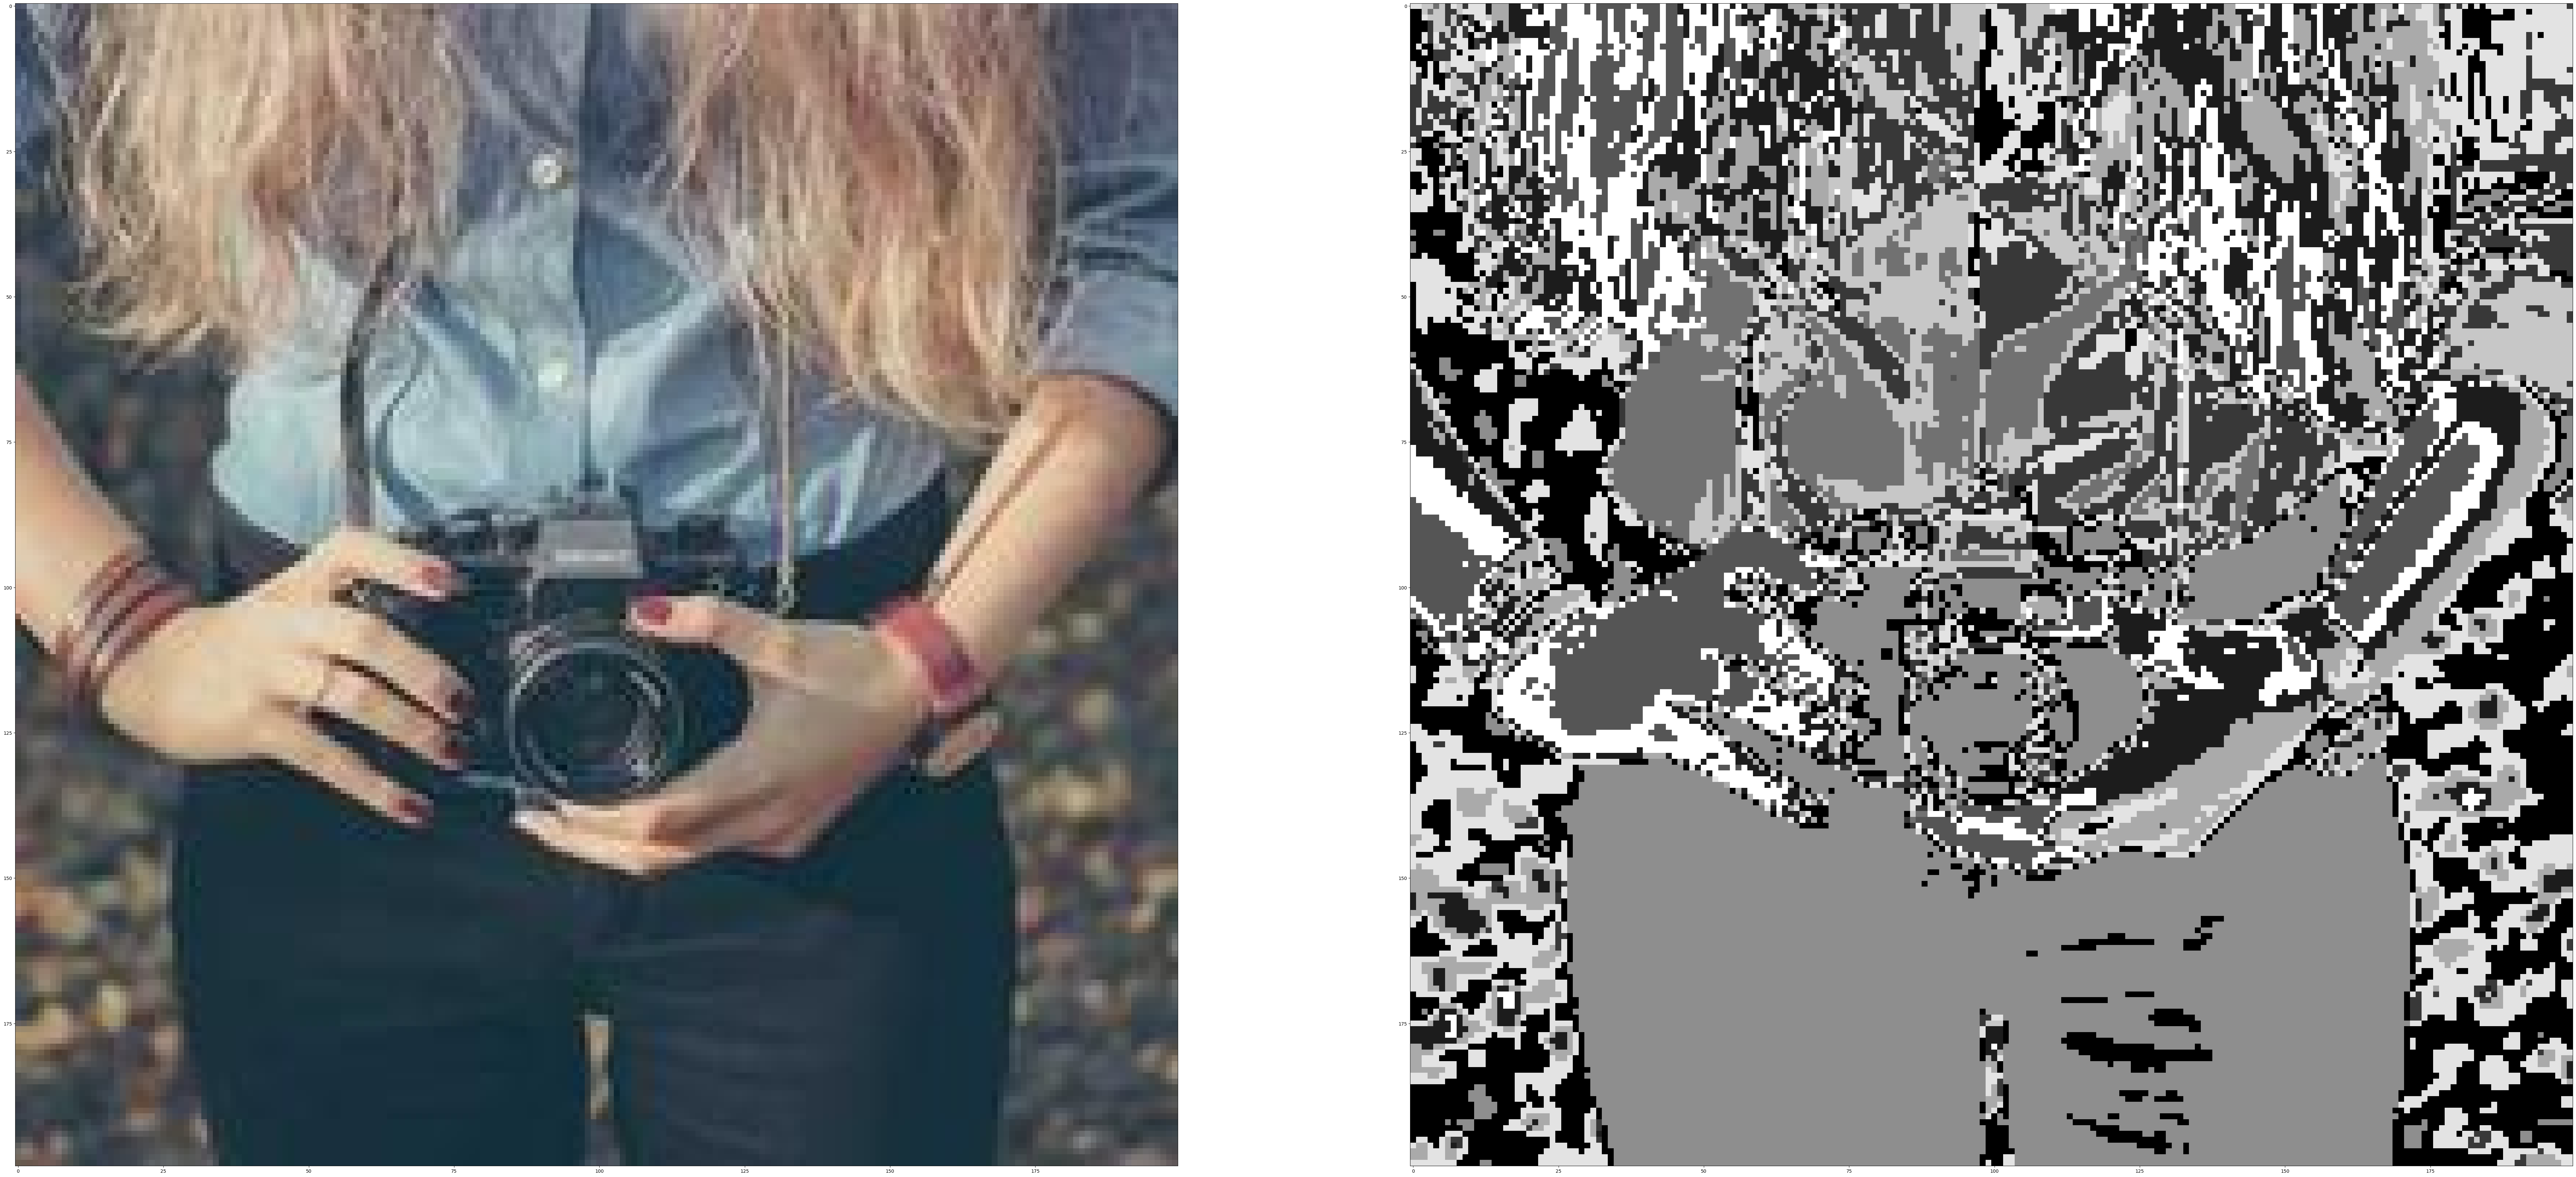

In [ ]:
# Reproduce the example above, use different image than the one provided in the example.

# Load an image and represent it as a vector space.

url = "https://picsum.photos/200"

# Read image
img = io.imread(url)

# convert to RGB from BGR
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# Notice the shape of pixel_values
print(pixel_values.shape)


#
# Cluster pixels in the RGB space
#

# Apply k-means clustering on the color space.
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)

# Convert the cluster labels into a 2D array.
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

# Display the images.
fig = plt.figure(figsize=(100,100))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(segmented,cmap='gray')

**Task 1.2**: Run the segmentation example above using different 'number of clusters' in the k-means algorithm. Show how the segmented image changes for each parameter configuration by displaying the original image, and the segmented image for each parameter configuration.



(40000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

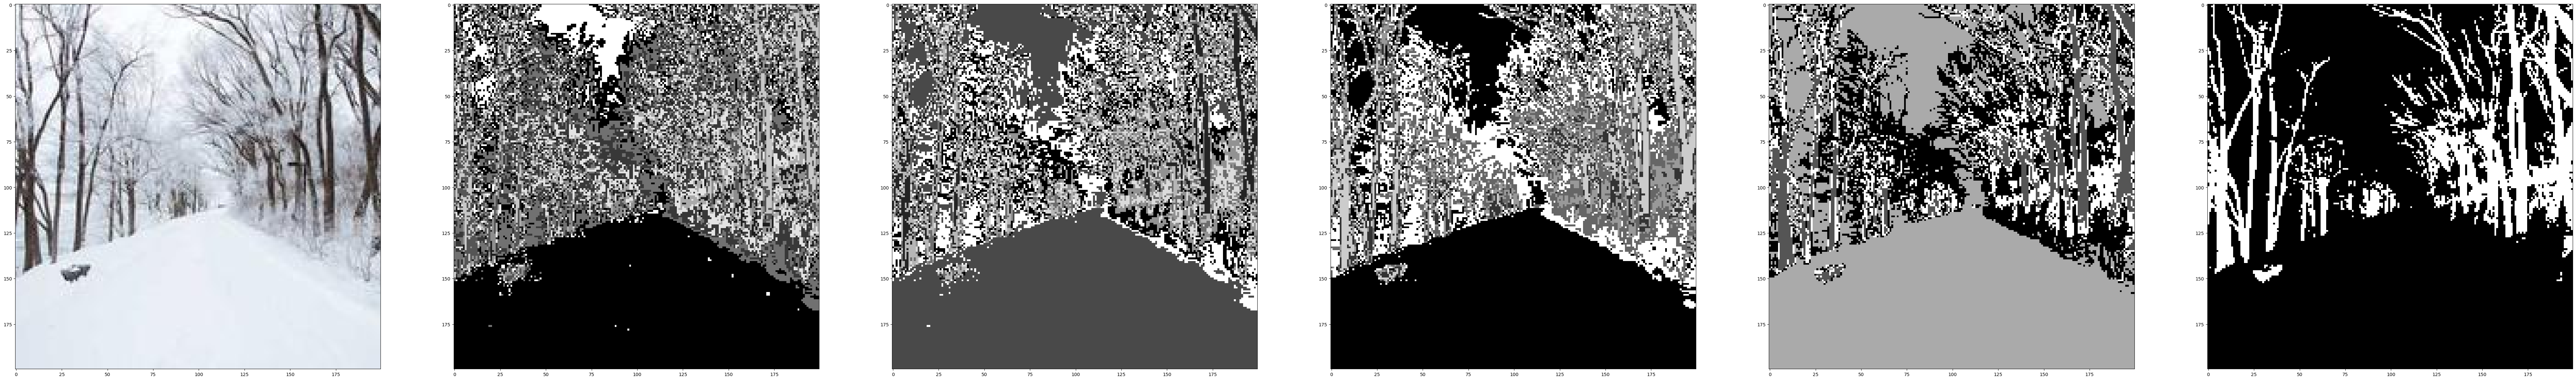

In [ ]:
#
# Use this cell to implement Task 1.2
#
# Load an image and represent it as a vector space.

url = "https://picsum.photos/200"

# Read image
img = io.imread(url)

# convert to RGB from BGR
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))

# convert to float
pixel_values = np.float32(pixel_values)

# Notice the shape of pixel_values
print(pixel_values.shape)


#
# Cluster pixels in the RGB space
#

# Apply k-means clustering on the color space.
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(pixel_values)
kmeans6 = KMeans(n_clusters=6, random_state=0).fit(pixel_values)
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(pixel_values)
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(pixel_values)
# Convert the cluster labels into a 2D array.
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)
segmented8 = kmeans8.labels_.reshape(segment_shape)
segmented6 = kmeans6.labels_.reshape(segment_shape)
segmented4 = kmeans4.labels_.reshape(segment_shape)
segmented2 = kmeans2.labels_.reshape(segment_shape)
# Display the images.
fig = plt.figure(figsize=(100,100))
plt.subplot(1,6,1)
plt.imshow(img)
plt.subplot(1,6,2)
plt.imshow(segmented,cmap='gray')
plt.subplot(1,6,3)
plt.imshow(segmented8,cmap='gray')
plt.subplot(1,6,4)
plt.imshow(segmented6,cmap='gray')
plt.subplot(1,6,5)
plt.imshow(segmented4,cmap='gray')
plt.subplot(1,6,6)
plt.imshow(segmented2,cmap='gray')


**Task 1.3**: Run the segmentation example above, but first filter the image. Try (a) to filter the image using a gaussian filter and show the segmentation results, and (b) filter the image using a median filter (i.e. use `cv.medianBlur` method of OpenCV - see documentation) Show how the segmented image changes for each of these two cases. Output the original image, and the segmented image for each parameter configuration.


(40000, 3)
(40000, 3)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-295b9e11cd0e>:37: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  medianKMeans = KMeans(n_clusters=10, random_state=0).fit(median_pixel_values)


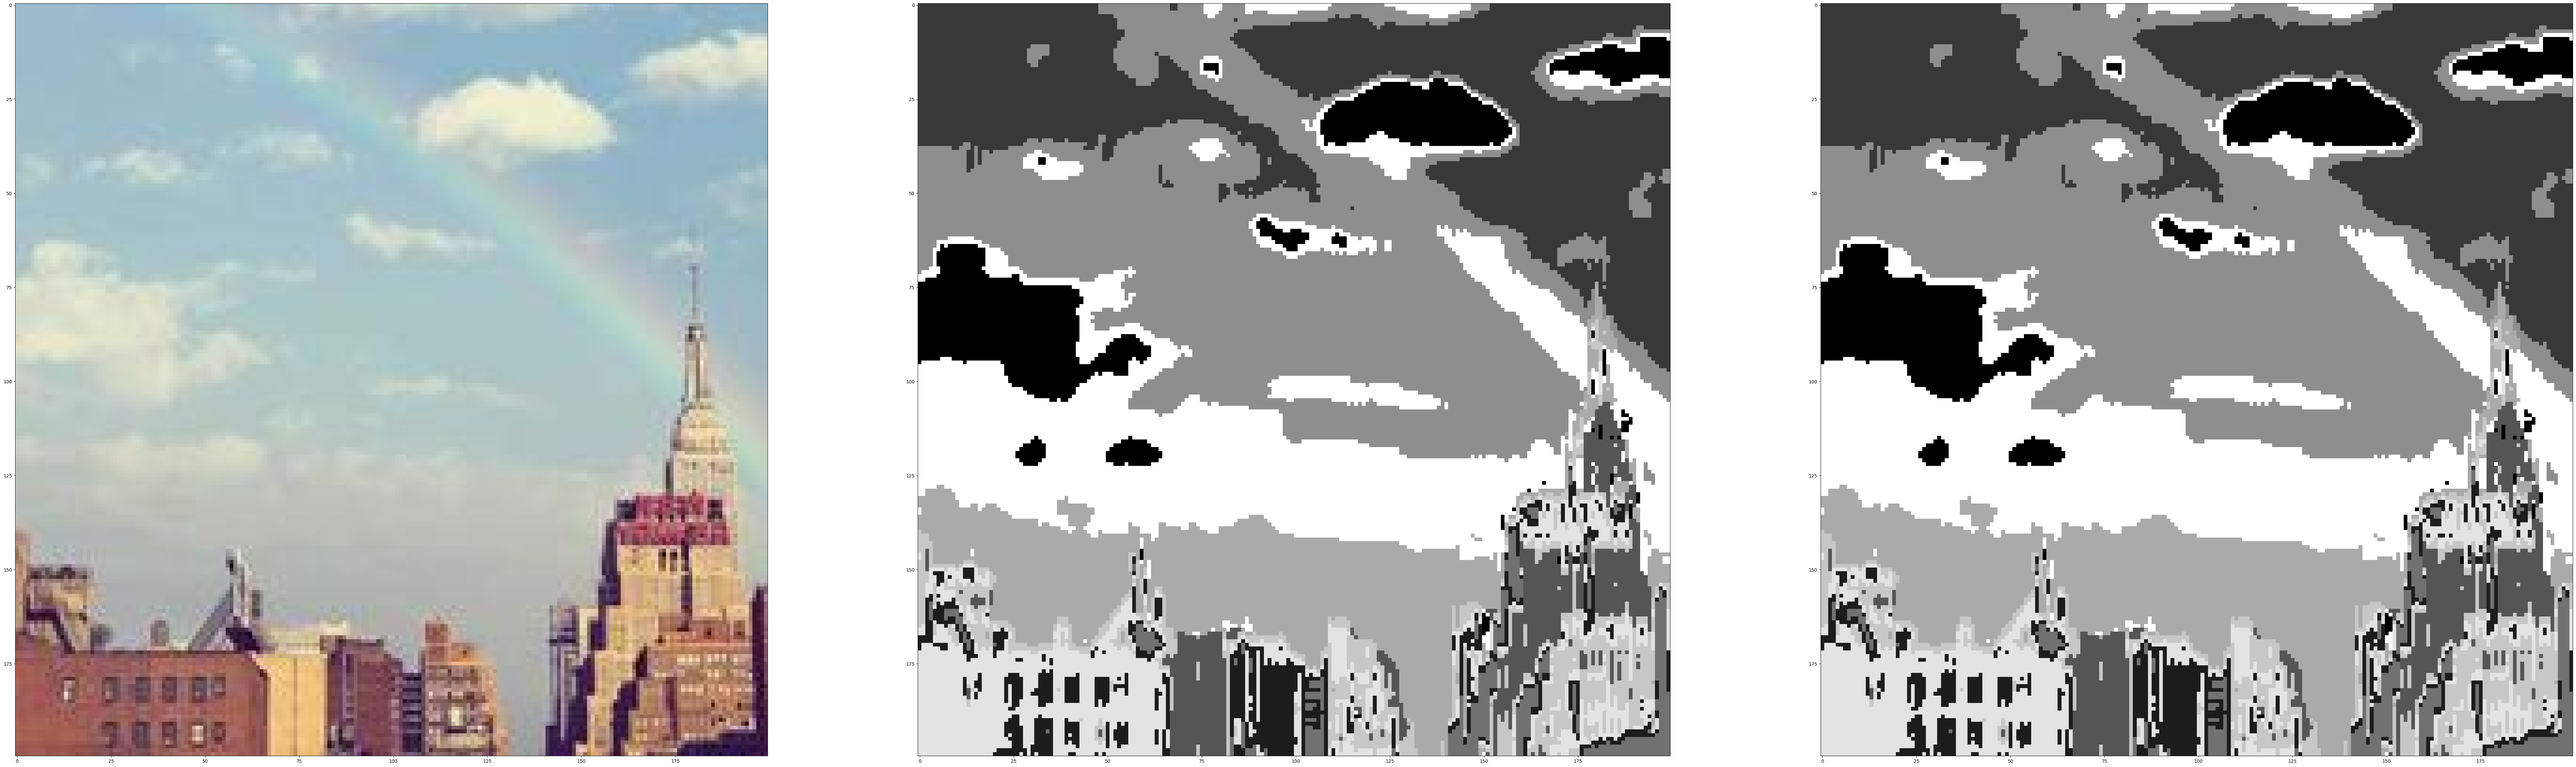

In [ ]:
#
# Use this cell to implement Tesk 1.3
#
# Reproduce the example above, use different image than the one provided in the example.

# Load an image and represent it as a vector space.

url = "https://picsum.photos/200"

# Read image
img = io.imread(url)

# convert to RGB from BGR
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

kernel = cv.getGaussianKernel(ksize=5,sigma=5)
medianKernel = cv.medianBlur(image, 5)
gaussImage = cv.filter2D(image, -1, kernel)
medianImage = cv.filter2D(image, -1, medianKernel)
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = gaussImage.reshape((-1, 3))
median_pixel_values = medianImage.reshape((-1,3))
# convert to float
pixel_values = np.float32(pixel_values)
median_pixel_values = np.float32(median_pixel_values)
# Notice the shape of pixel_values
print(pixel_values.shape)
print(median_pixel_values.shape)


#
# Cluster pixels in the RGB space
#

# Apply k-means clustering on the color space.
kmeans = KMeans(n_clusters=10, random_state=0).fit(pixel_values)
medianKMeans = KMeans(n_clusters=10, random_state=0).fit(median_pixel_values)
# Convert the cluster labels into a 2D array.
segment_shape = (image.shape[0], image.shape[1])
segmented = kmeans.labels_.reshape(segment_shape)

median_segment_shape = (image.shape[0],image.shape[1])
median_segmented = kmeans.labels_.reshape(median_segment_shape)
# Display the images.
fig = plt.figure(figsize=(100,100))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(segmented,cmap='gray')
plt.subplot(1,3,3)
plt.imshow(median_segmented,cmap='gray')



## Exercise 02: Segmentation using filter bank.

When approaching image segmentation as a clustering problem, we need to have a representation of each pixel in some vector space. The color-space (RGB) is not always informative enough to generate meaningful clusters. Alternatively, we can apply several filters in the image to capture the local properties of each pixel and use the resulting vector as a feature representation.

The code below illustrates how to generate such a multi-variate representation by applying different filters.

```python
#
# Load the image
#
url = "https://www.rxwiki.com/sites/files/styles/article_2/public/photo/dreamstime_s_49220741.jpg"
img = io.imread(url)

# Create a panda frame to accumulate the features;
# Each row would be a pixel and each colum will denote a feature.

df = pd.DataFrame()

#
# Feature 1: Add the raw intensity as a feature.
#

# Convert the image to gray-scale, and then into a 1D vector;
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  
df['Original Image'] = img.reshape(-1)    #Add column to original dataframe



#
# Feature 2: Add edge pixels as feature
#

edges = cv.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe


#
# Feature 3,4,5: SOBEL edge pixels; Gaussian filter with sigma 3, and sigma 7
#


#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


#
# Add Gabor filters, with different theta, lamda, gamma parameters
#

kernel_idx = 1;
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3 standard deviation
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths.
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
            
                
                gabor_label = 'Gabor' + str(kernel_idx)  #Label Gabor columns as Gabor1, Gabor2, etc.
                # print(gabor_label)
                ksize=9

                # Get gabor kernel, with set parameters.
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)    
                
                # Add kernel to the filter bank.

                kernels.append(kernel)

                #Now filter the image and add values to a new column
                fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

                # Convert the image to one dimensional vector.
                filtered_img = fimg.reshape(-1)

                # Added gabor filters to the data frame.
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                kernel_idx += 1  #Increment for gabor column label


# Here df


```


**Task 2.1**. Try to reproduce the code below in the cell provided below. Inspect the content of df DataFrame and note how many features the filter bank generated.


In [3]:
# Implement Task 2.1 here.
#
# Load the image
#
url = "https://www.rxwiki.com/sites/files/styles/article_2/public/photo/dreamstime_s_49220741.jpg"
img = io.imread(url)

# Create a panda frame to accumulate the features;
# Each row would be a pixel and each colum will denote a feature.

df = pd.DataFrame()

#
# Feature 1: Add the raw intensity as a feature.
#

# Convert the image to gray-scale, and then into a 1D vector;
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df['Original Image'] = img.reshape(-1)    #Add column to original dataframe



#
# Feature 2: Add edge pixels as feature
#

edges = cv.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe


#
# Feature 3,4,5: SOBEL edge pixels; Gaussian filter with sigma 3, and sigma 7
#


# SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

# GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

# GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


#
# Add Gabor filters, with different theta, lamda, gamma parameters
#

kernel_idx = 1;
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3 standard deviation
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths.
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


                gabor_label = 'Gabor' + str(kernel_idx)  #Label Gabor columns as Gabor1, Gabor2, etc.
                # print(gabor_label)
                ksize=9

                # Get gabor kernel, with set parameters.
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)

                # Add kernel to the filter bank.

                kernels.append(kernel)

                #Now filter the image and add values to a new column
                fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

                # Convert the image to one dimensional vector.
                filtered_img = fimg.reshape(-1)

                # Added gabor filters to the data frame.
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                kernel_idx += 1  #Increment for gabor column label


# Here df

print("There are 32 gabor attributes in the dataframe.")
df

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

,Original Image,Canny Edge,Sobel,Gaussian s3,Gaussian s7,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,...,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32
0,73,0,0.008376,73,82,0,0,255,193,103,...,150,26,0,0,255,255,38,19,60,34
1,76,0,0.012284,73,82,0,0,255,202,116,...,150,29,0,0,255,255,37,20,62,37
2,77,0,0.004384,74,82,0,0,255,213,122,...,151,30,0,0,255,255,36,19,65,39
3,76,0,0.008376,75,83,0,0,255,221,135,...,151,27,0,0,255,255,36,19,63,37
4,75,0,0.008434,77,84,0,0,255,213,125,...,156,28,0,0,255,255,38,21,68,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291595,170,0,0.004159,170,173,0,0,255,255,255,...,255,61,0,0,255,255,69,32,145,85
291596,171,0,0.009853,169,173,0,0,255,255,255,...,255,65,0,0,255,255,100,59,145,86
291597,168,0,0.010961,168,172,0,0,255,255,255,...,255,61,0,0,255,255,64,26,161,100
291598,167,0,0.003100,168,172,0,0,255,255,255,...,255,62,0,0,255,255,102,61,150,90


**Task 2.2** Apply k-means clustering of the filter bank feature space you generated above and display the resulting segmented image.


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

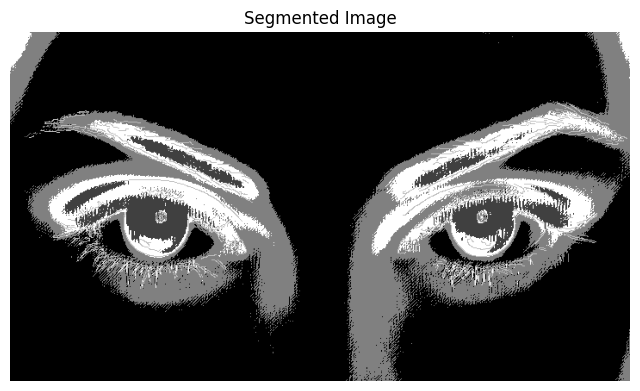

In [ ]:
# Implement Task 2.2 here
#
# Load the image
#
url = "https://www.rxwiki.com/sites/files/styles/article_2/public/photo/dreamstime_s_49220741.jpg"
img = io.imread(url)

# Create a panda frame to accumulate the features;
# Each row would be a pixel and each colum will denote a feature.

df = pd.DataFrame()

#
# Feature 1: Add the raw intensity as a feature.
#

# Convert the image to gray-scale, and then into a 1D vector;
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df['Original Image'] = img.reshape(-1)    #Add column to original dataframe



#
# Feature 2: Add edge pixels as feature
#

edges = cv.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe


#
# Feature 3,4,5: SOBEL edge pixels; Gaussian filter with sigma 3, and sigma 7
#


# SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

# GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

# GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


#
# Add Gabor filters, with different theta, lamda, gamma parameters
#

kernel_idx = 1;
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3 standard deviation
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths.
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


                gabor_label = 'Gabor' + str(kernel_idx)  #Label Gabor columns as Gabor1, Gabor2, etc.
                # print(gabor_label)
                ksize=9

                # Get gabor kernel, with set parameters.
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)

                # Add kernel to the filter bank.

                kernels.append(kernel)

                #Now filter the image and add values to a new column
                fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

                # Convert the image to one dimensional vector.
                filtered_img = fimg.reshape(-1)

                # Added gabor filters to the data frame.
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                kernel_idx += 1  #Increment for gabor column label


num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df.drop('Original Image', axis=1))


clustered_image = df['Cluster'].values.reshape(img.shape)


plt.figure(figsize=(8, 8))
plt.imshow(clustered_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

**Task 2.3** Try different parameter configurations for your filter bank and clustering algorithm and apply the filter-bank segmentation procedure on an image of your choosing. Try to identify a parameter configuration that results in a reasonable segmentation.


Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

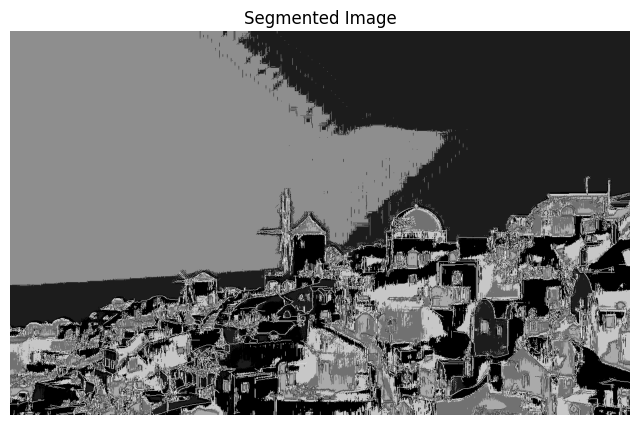

In [ ]:
# Implement Task 2.3 here
# Load the image
#
url = "https://fastly.picsum.photos/id/49/1280/792.jpg?hmac=NnUJy0O9-pXHLmY2loqVs2pJmgw9xzuixgYOk4ALCXU"
img = io.imread(url)

# Create a panda frame to accumulate the features;
# Each row would be a pixel and each colum will denote a feature.

df = pd.DataFrame()

#
# Feature 1: Add the raw intensity as a feature.
#

# Convert the image to gray-scale, and then into a 1D vector;
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
df['Original Image'] = img.reshape(-1)    #Add column to original dataframe



#
# Feature 2: Add edge pixels as feature
#

edges = cv.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1  #Add column to original dataframe


#
# Feature 3,4,5: SOBEL edge pixels; Gaussian filter with sigma 3, and sigma 7
#


# SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

# GAUSSIAN with sigma=3

gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

# GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3


#
# Add Gabor filters, with different theta, lamda, gamma parameters
#

kernel_idx = 1;
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3 standard deviation
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths.
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5


                gabor_label = 'Gabor' + str(kernel_idx)  #Label Gabor columns as Gabor1, Gabor2, etc.
                # print(gabor_label)
                ksize=9

                # Get gabor kernel, with set parameters.
                kernel = cv.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv.CV_32F)

                # Add kernel to the filter bank.

                kernels.append(kernel)

                #Now filter the image and add values to a new column
                fimg = cv.filter2D(img, cv.CV_8UC3, kernel)

                # Convert the image to one dimensional vector.
                filtered_img = fimg.reshape(-1)

                # Added gabor filters to the data frame.
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                kernel_idx += 1  #Increment for gabor column label


num_clusters = 10
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(df.drop('Original Image', axis=1))


clustered_image = df['Cluster'].values.reshape(img.shape)


plt.figure(figsize=(8, 8))
plt.imshow(clustered_image, cmap='gray')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


Copyright Statement: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials as well as any of their derivatives without the instructor's express written consent.